In [1]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('crop.csv')

In [3]:
df

,HUMIDITY,PH,RAIN,TEMPARATURE,N,P,K
0,5,0.00,0,31.36,0,18,4
1,5,0.01,20000,31.85,0,23,2
2,4,0.00,1023,31.85,0,20,31
3,5,0.00,1023,31.85,0,19,32
4,4,0.00,1023,31.36,0,21,29
...,...,...,...,...,...,...,...
18406,9,0.00,395,31.36,0,39,35
18407,8,0.00,395,31.85,0,29,35
18408,8,0.00,395,31.36,4,35,36
18409,8,0.00,395,31.36,0,40,35


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18411 entries, 0 to 18410
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HUMIDITY     18411 non-null  int64  
 1          PH    18411 non-null  float64
 2        RAIN    18411 non-null  int64  
 3   TEMPARATURE  18411 non-null  float64
 4           N    18411 non-null  int64  
 5           P    18411 non-null  int64  
 6           K    18411 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 1007.0 KB


In [5]:
df.describe()

,HUMIDITY,PH,RAIN,TEMPARATURE,N,P,K
count,18411.000000,18411.000000,18411.000000,18411.000000,18411.000000,18411.000000,18411.000000
mean,7.524197,1.033505,660.083320,31.562270,5.315138,17.190918,31.555809
std,1.603973,0.664882,338.299318,0.482932,5.264785,23.135137,6.393486
min,0.000000,0.000000,0.000000,24.010000,0.000000,0.000000,2.000000
25%,7.000000,0.250000,396.000000,31.360000,0.000000,0.000000,31.000000
50%,8.000000,1.340000,548.000000,31.360000,4.000000,7.000000,33.000000
75%,8.000000,1.560000,1023.000000,31.850000,8.000000,36.000000,35.000000
max,18.000000,2.270000,20000.000000,37.240000,19.000000,2118.000000,228.000000


In [6]:
df.columns

Index(['HUMIDITY', '       PH', '     RAIN', 'TEMPARATURE', '        N',
       '        P', '        K'],
      dtype='object')

In [7]:
label = pd.Series([])
soil_type = pd.Series([])

In [8]:
#1=clay 2=
for i in range(len(df)):
    if df["     RAIN"][i] <= 400:
        label[i]="rice"
        soil_type[i]=1
    elif df["     RAIN"][i] <= 600:
        label[i]="cofee"
        soil_type[i]=2
    elif df["     RAIN"][i] == 1023:
        label[i]="onion"
        soil_type[i]=3
    elif df["     RAIN"][i] <= 800:
        label[i]="tomato"
        soil_type[i]=4
    else:
        label[i]= "potato"
        soil_type[i]=5
# inserting new column with values of list made above	
df.insert(7, "soil_type", soil_type)
df.insert(8, "label", label)

In [9]:
df.columns

Index(['HUMIDITY', '       PH', '     RAIN', 'TEMPARATURE', '        N',
       '        P', '        K', 'soil_type', 'label'],
      dtype='object')

In [10]:
df

,HUMIDITY,PH,RAIN,TEMPARATURE,N,P,K,soil_type,label
0,5,0.00,0,31.36,0,18,4,1,rice
1,5,0.01,20000,31.85,0,23,2,5,potato
2,4,0.00,1023,31.85,0,20,31,3,onion
3,5,0.00,1023,31.85,0,19,32,3,onion
4,4,0.00,1023,31.36,0,21,29,3,onion
...,...,...,...,...,...,...,...,...,...
18406,9,0.00,395,31.36,0,39,35,1,rice
18407,8,0.00,395,31.85,0,29,35,1,rice
18408,8,0.00,395,31.36,4,35,36,1,rice
18409,8,0.00,395,31.36,0,40,35,1,rice


In [11]:
df.size

165699

In [12]:
df.shape

(18411, 9)

In [13]:
df.columns

Index(['HUMIDITY', '       PH', '     RAIN', 'TEMPARATURE', '        N',
       '        P', '        K', 'soil_type', 'label'],
      dtype='object')

In [14]:
df['label'].unique()

array(['rice', 'potato', 'onion', 'cofee', 'tomato'], dtype=object)

In [15]:
df.dtypes

HUMIDITY         int64
       PH      float64
     RAIN        int64
TEMPARATURE    float64
        N        int64
        P        int64
        K        int64
soil_type        int64
label           object
dtype: object

In [16]:
df['label'].value_counts()

onion     5995
rice      5160
cofee     4161
tomato    2009
potato    1086
Name: label, dtype: int64

<AxesSubplot:>

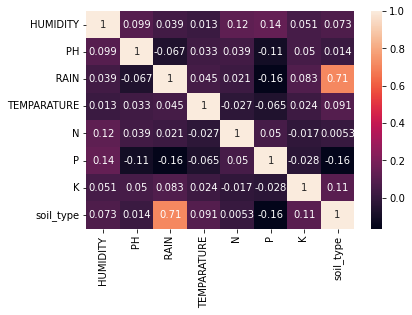

In [17]:
sns.heatmap(df.corr(),annot=True)

In [18]:
features = df[['HUMIDITY', '       PH','     RAIN','TEMPARATURE', '        N', '        P', '        K','soil_type']]
target = df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

In [19]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [20]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [21]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  100.0
              precision    recall  f1-score   support

       cofee       1.00      1.00      1.00       818
       onion       1.00      1.00      1.00      1240
      potato       1.00      1.00      1.00       212
        rice       1.00      1.00      1.00      1014
      tomato       1.00      1.00      1.00       399

    accuracy                           1.00      3683
   macro avg       1.00      1.00      1.00      3683
weighted avg       1.00      1.00      1.00      3683



In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [24]:
score

array([1., 1., 1., 1., 1.])

In [25]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

In [26]:
import pickle

In [27]:
model1 = pickle.load(open('DecisionTree.pkl', 'rb'))

In [28]:
#data = np.array([[5,0,0,31,0,18,4,1]])
#prediction = model1.predict(data)
prediction = model1.predict(np.array([[5,1,0,31,0,18,4,1]]))
print(prediction)

['rice']
